<a href="https://colab.research.google.com/github/Raghavendra732/basic-state/blob/main/K_NEAREST_NEIGHBOURS()_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Raghavendraswamy
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns



In [ ]:
#Loading the dataset
df=pd.read_csv('Zoo.csv')

In [ ]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [ ]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


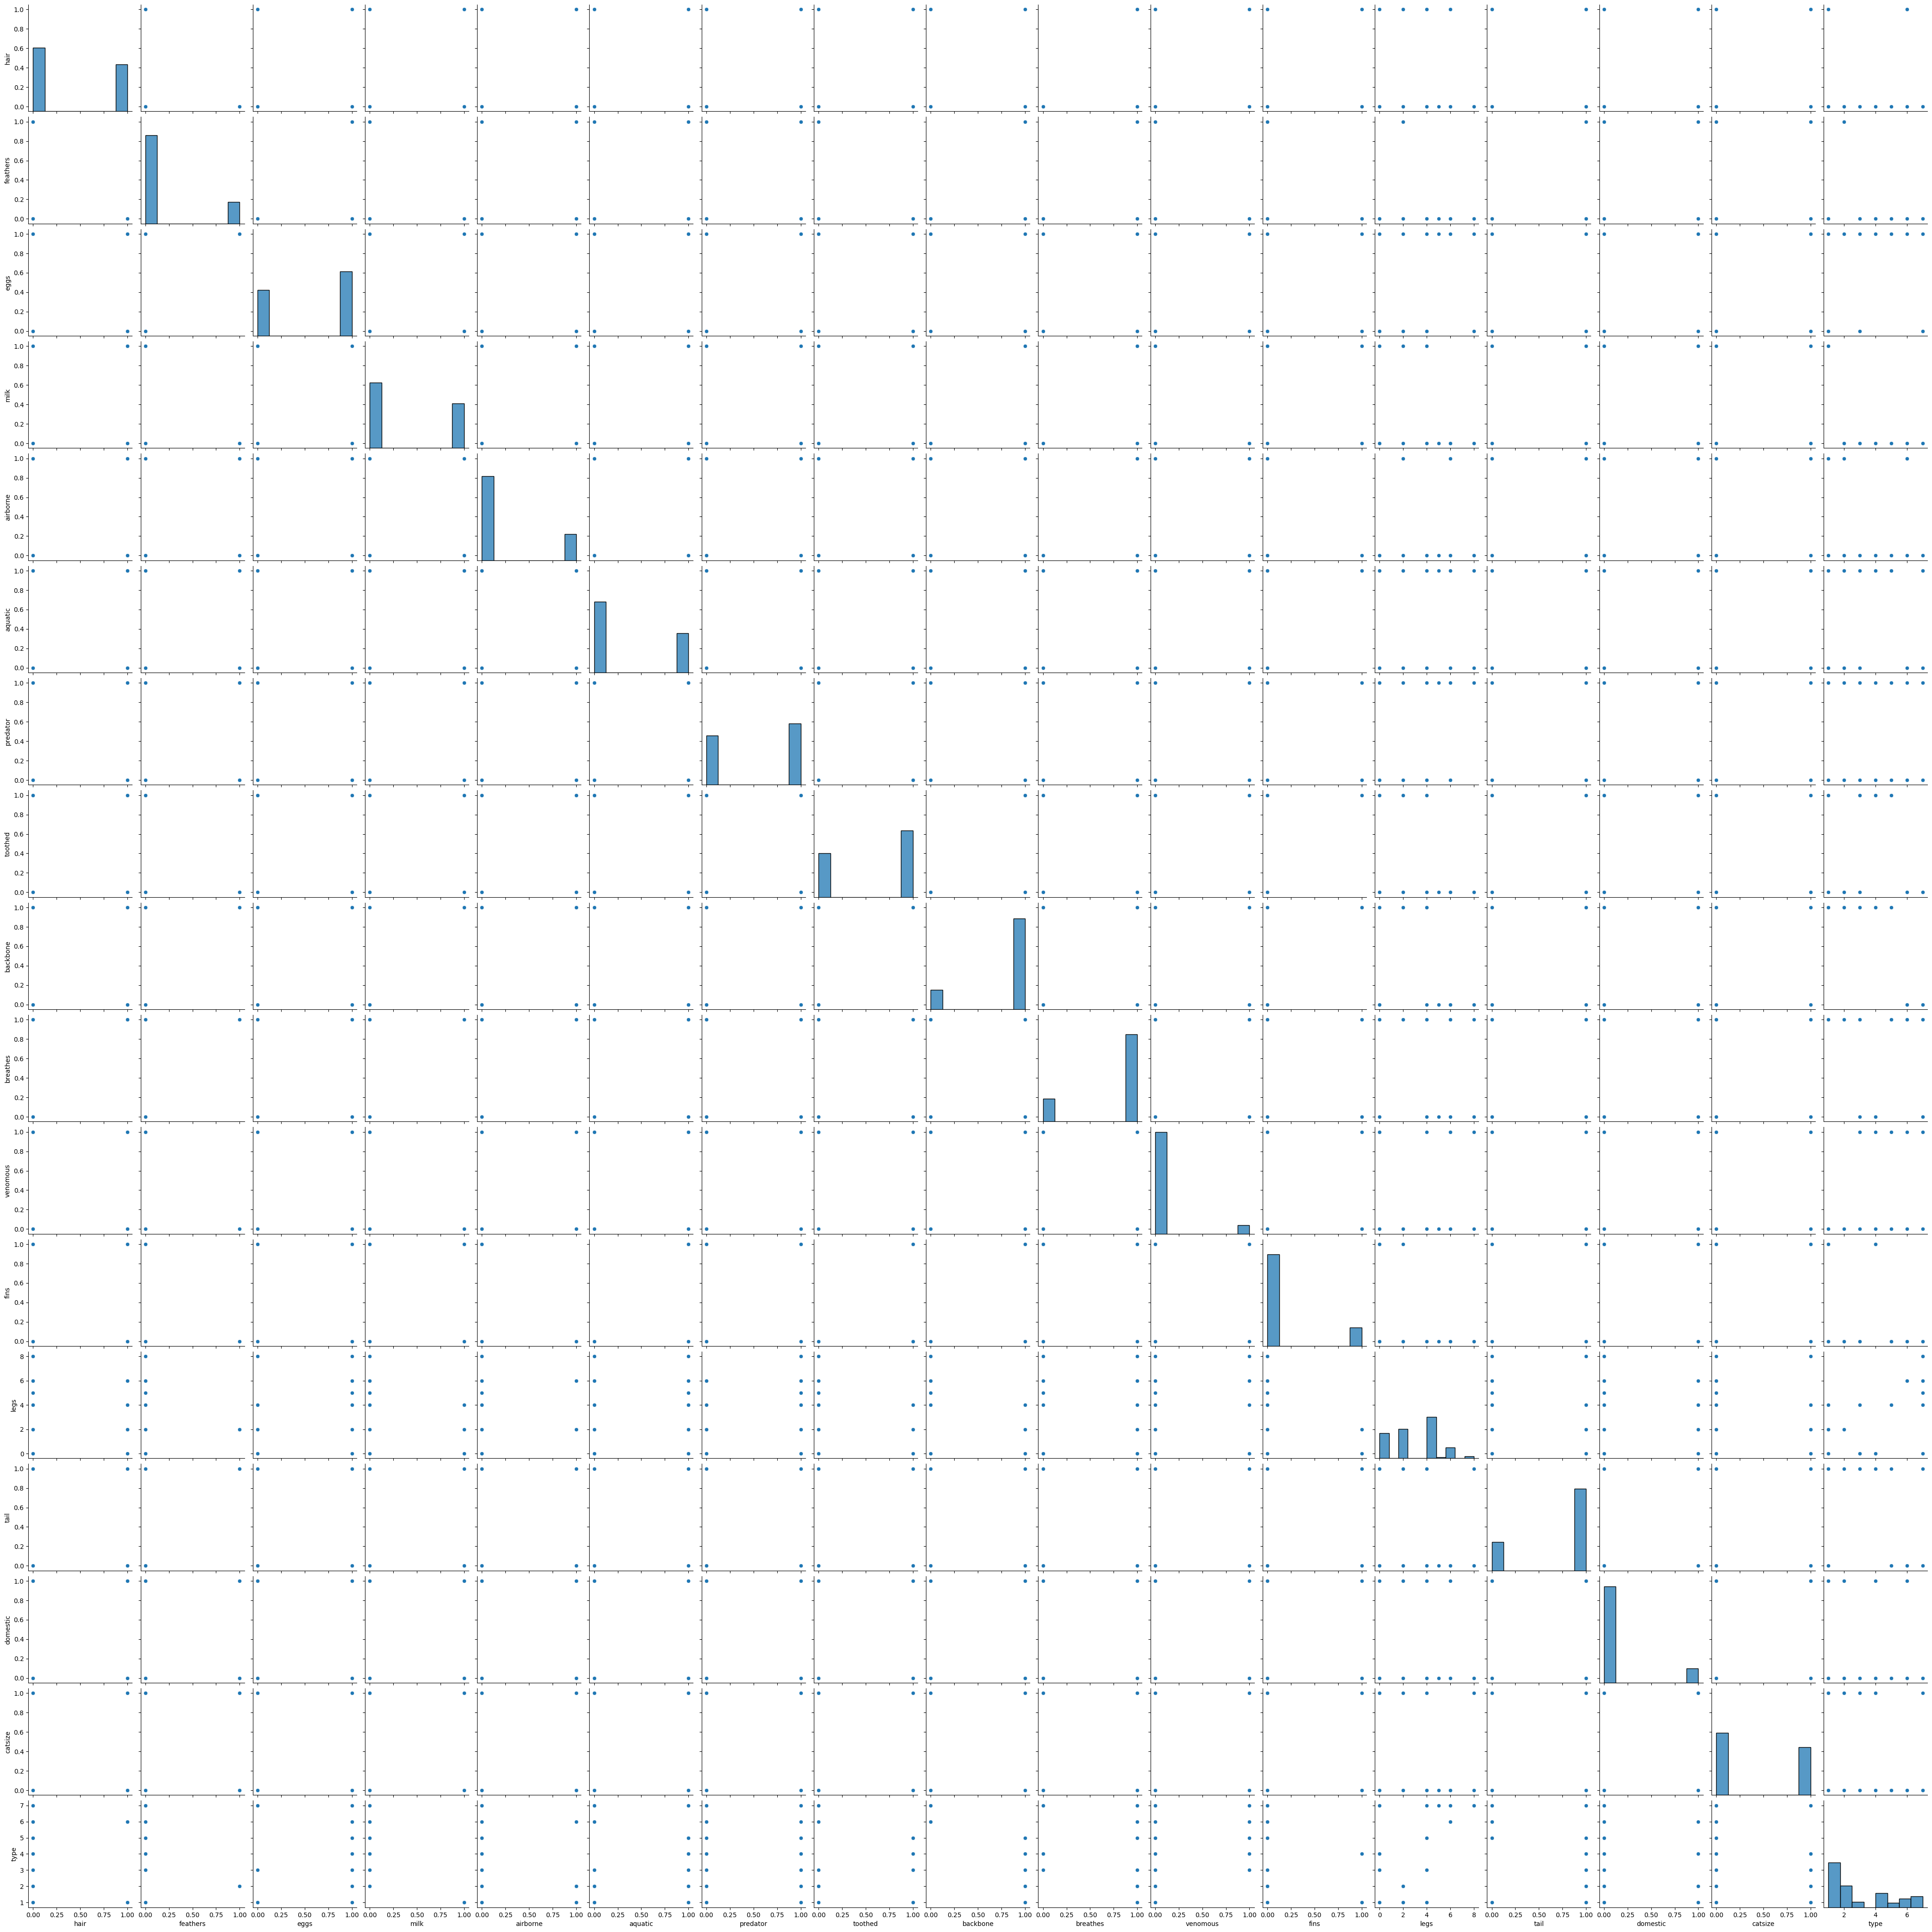

In [ ]:
#Create visualizations
sns.pairplot(df)

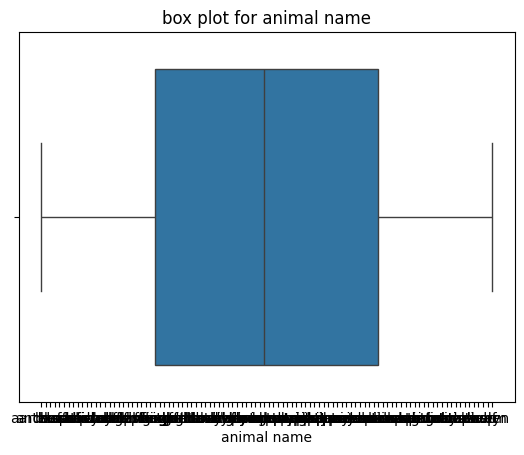

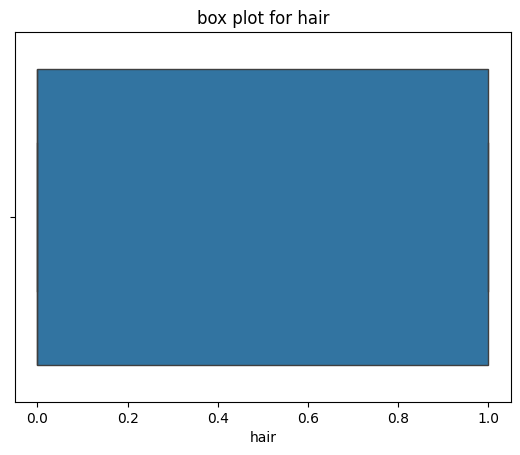

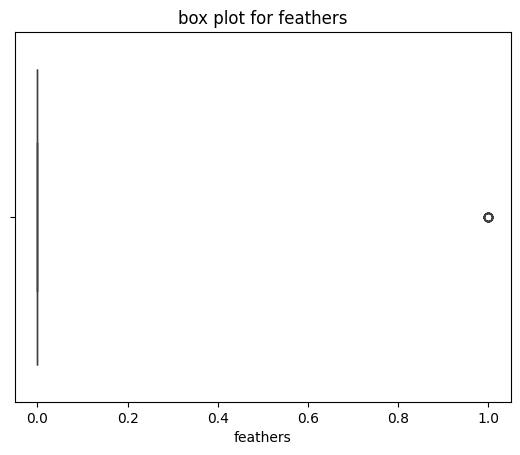

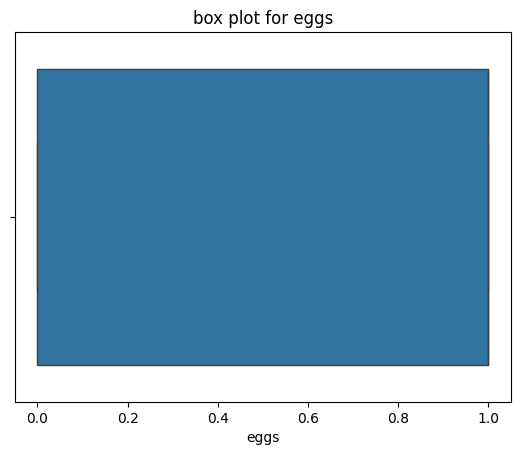

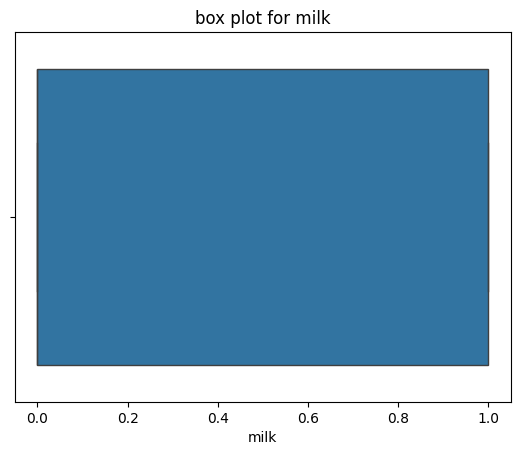

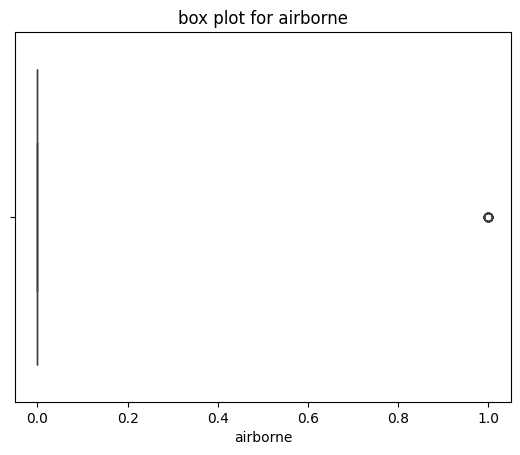

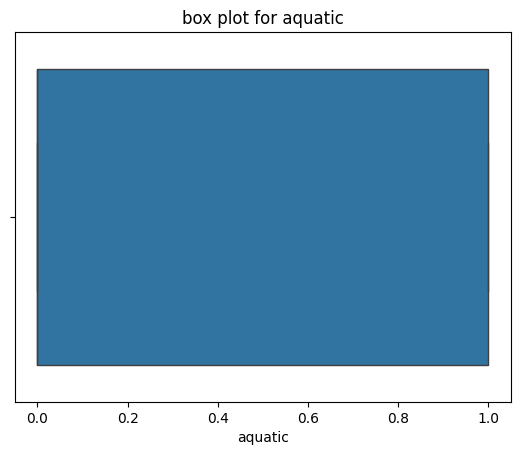

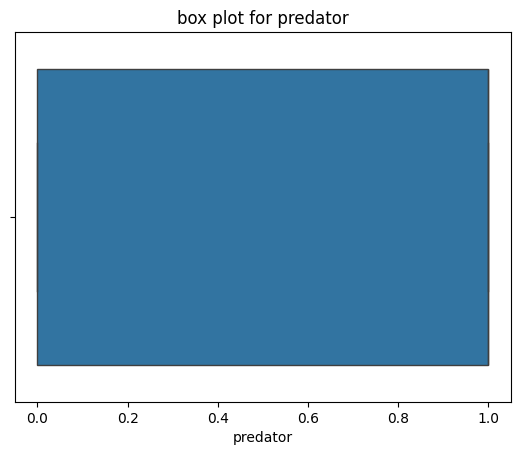

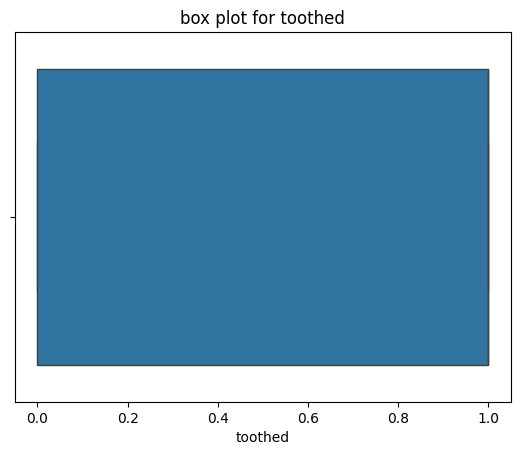

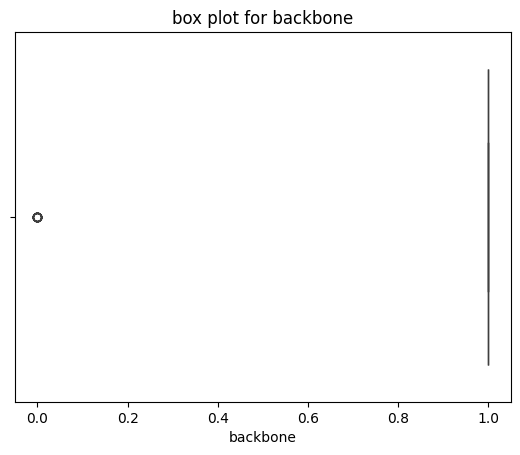

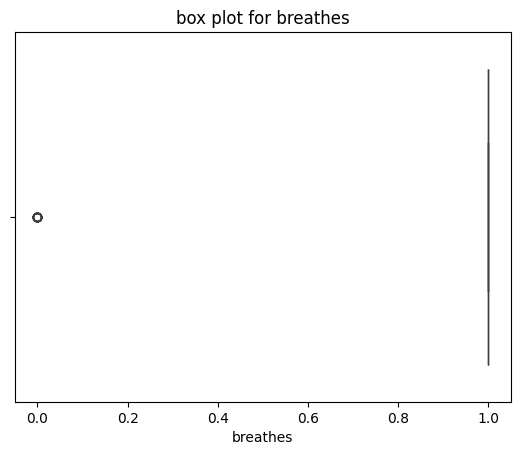

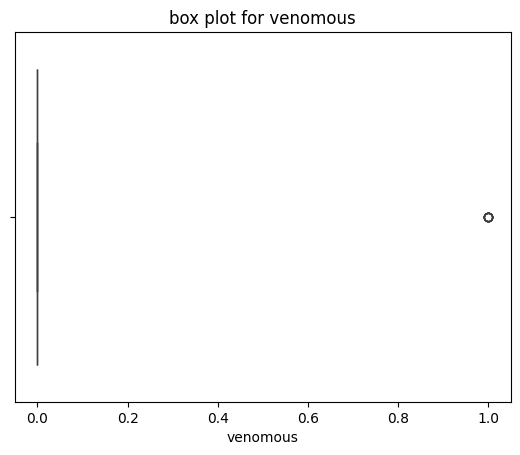

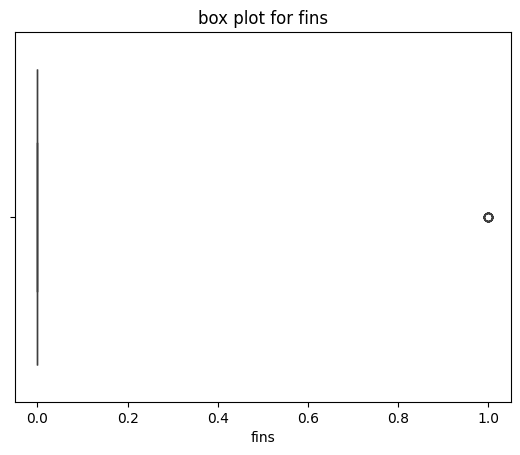

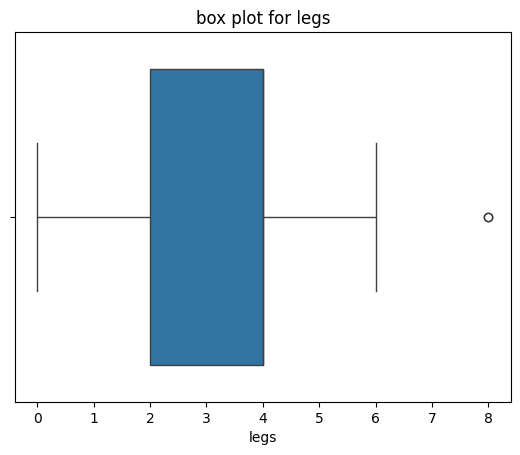

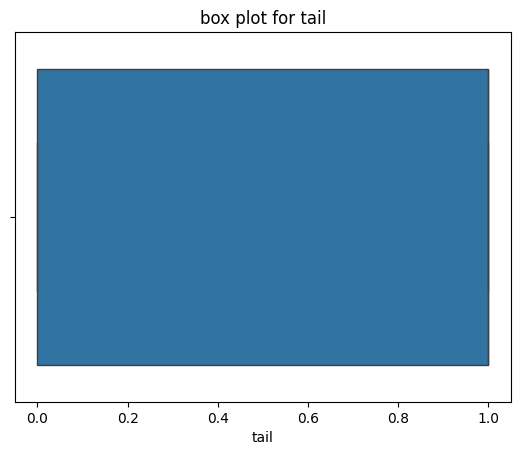

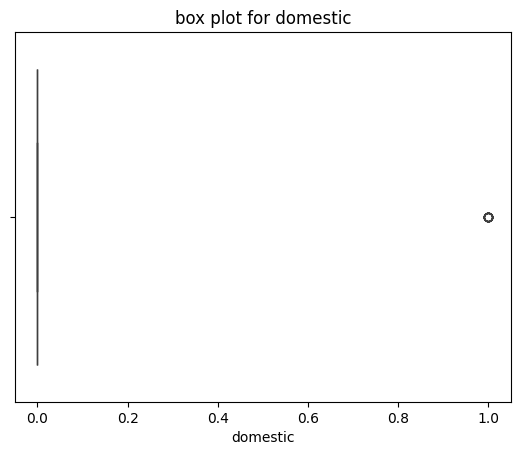

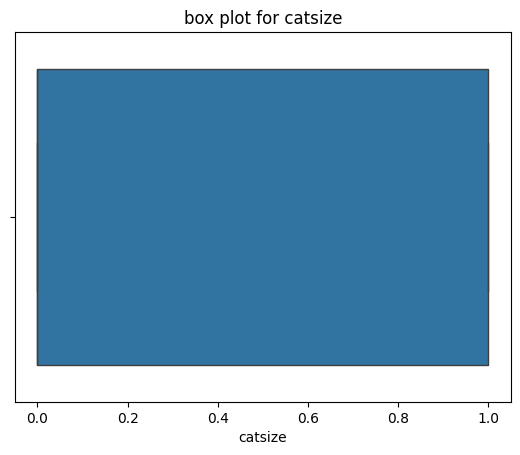

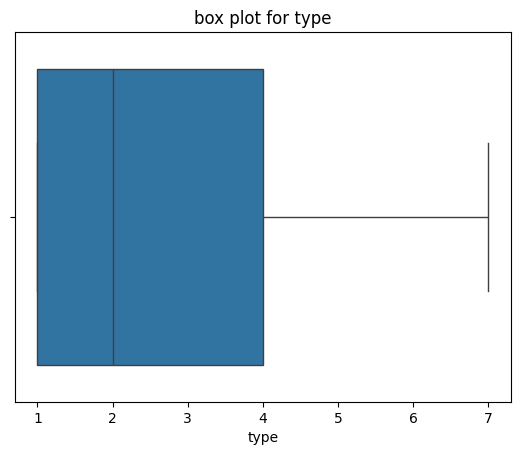

In [ ]:
#boxplot to find outliers
for i in df.columns:
    plt.figure( figure=(5,5))
    sns.boxplot(x=df[i])
    plt.title(f'box plot for {i}')
    plt.show()


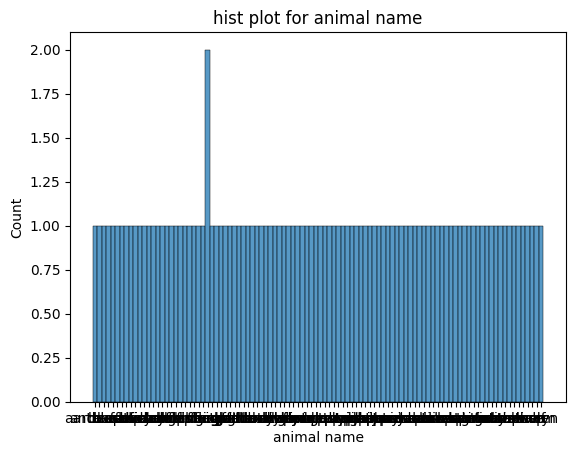

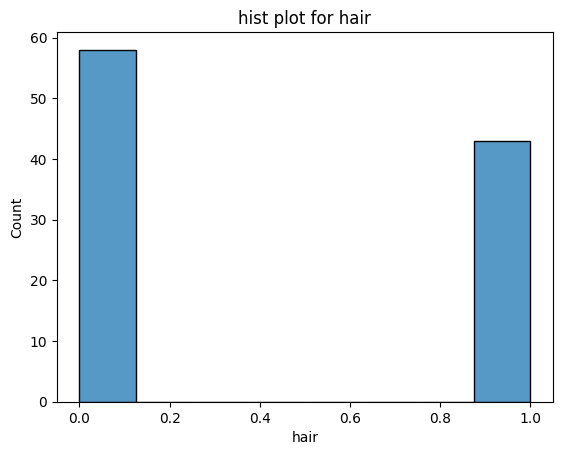

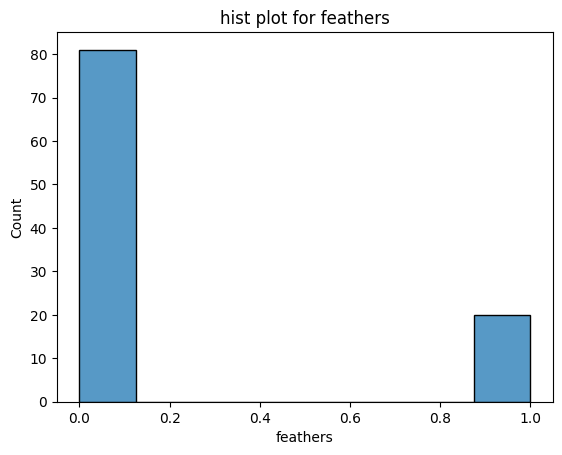

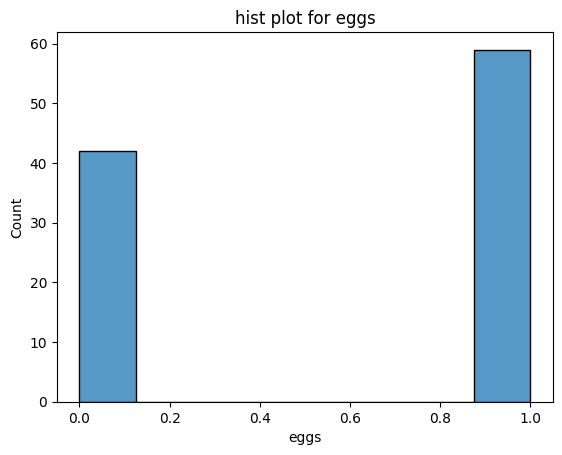

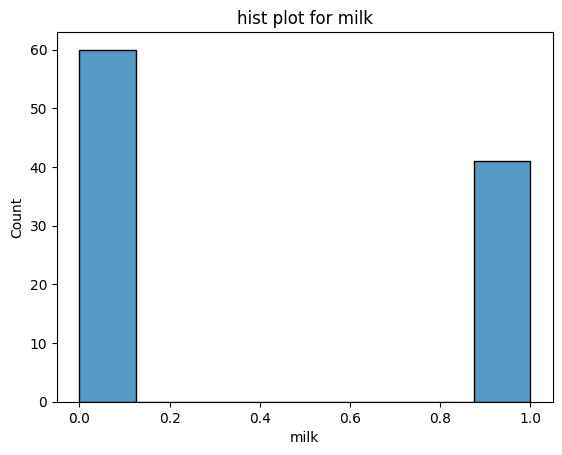

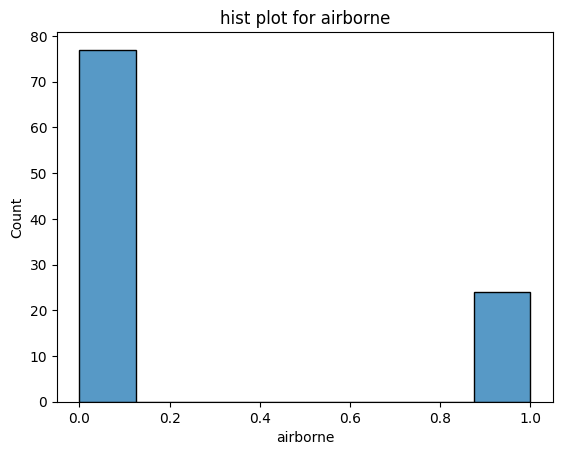

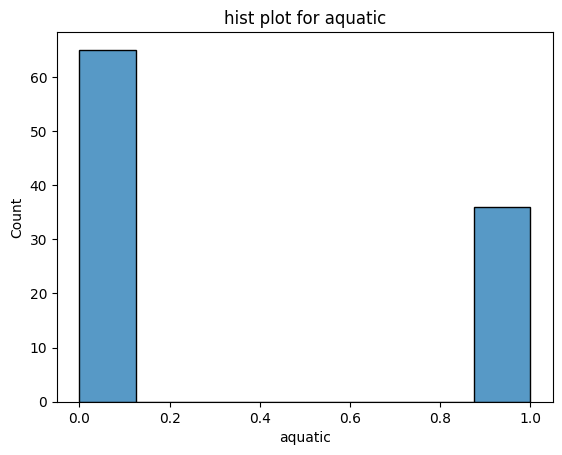

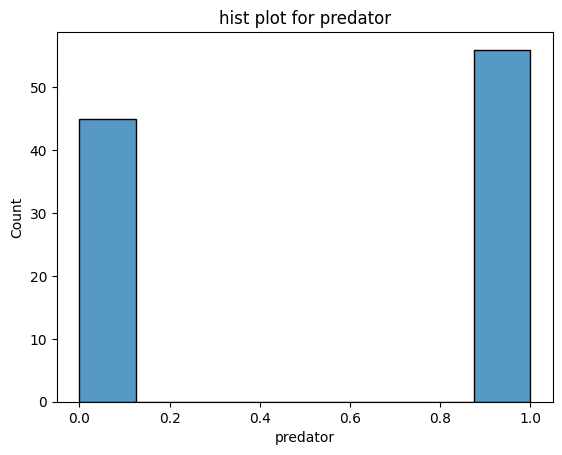

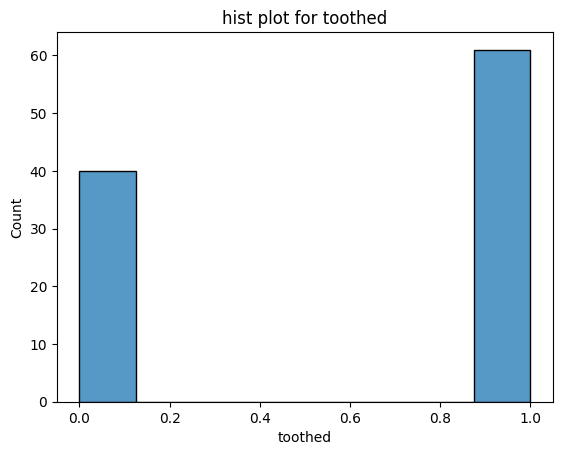

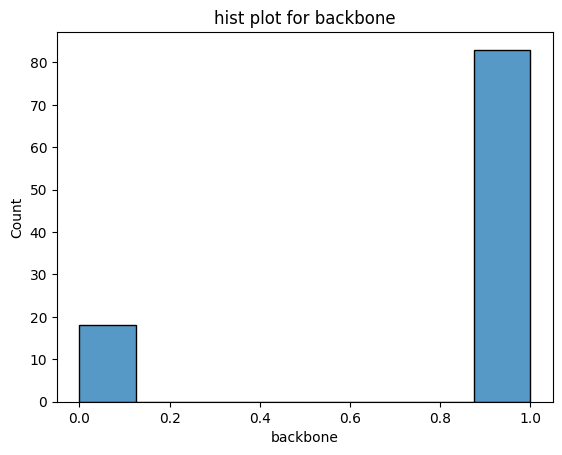

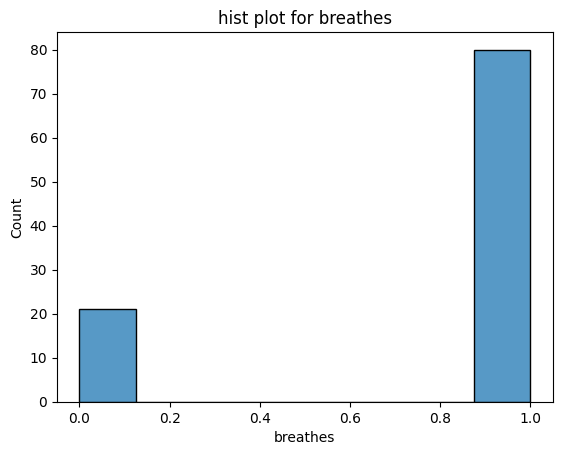

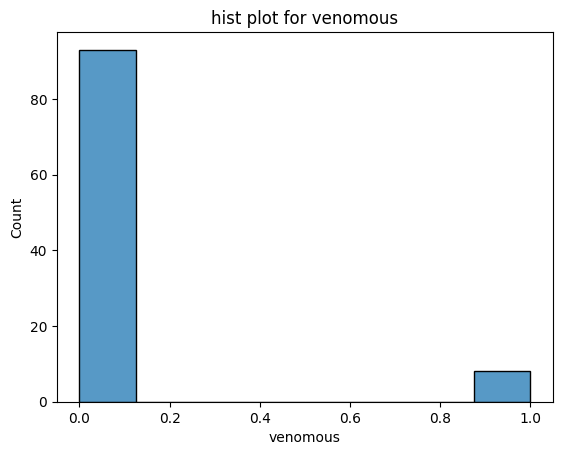

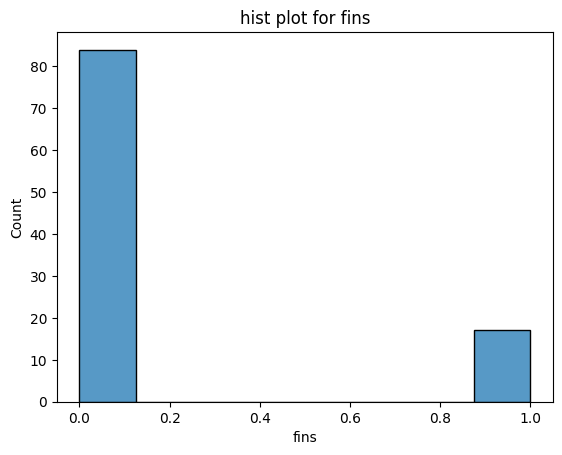

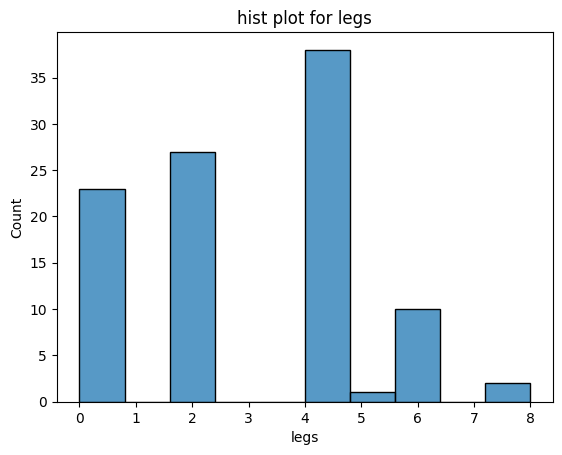

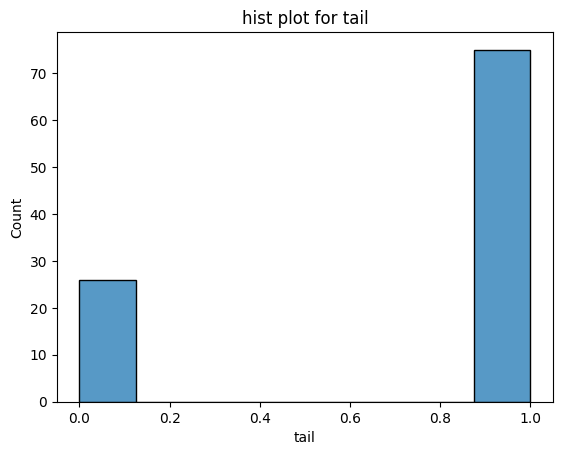

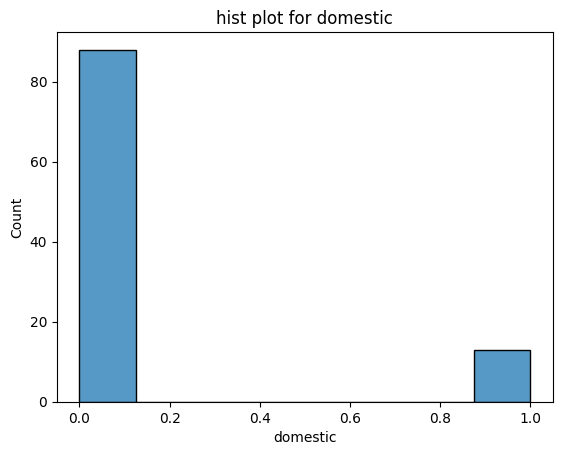

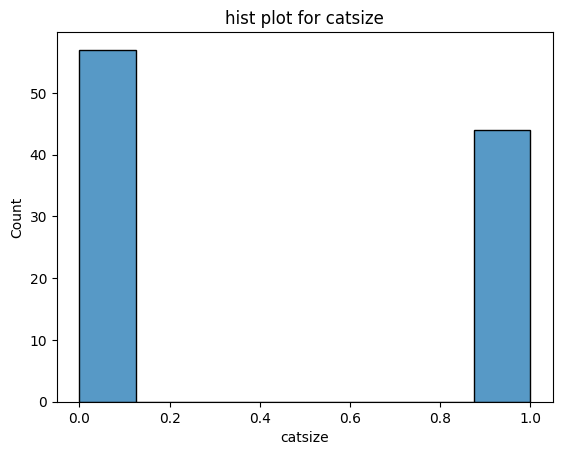

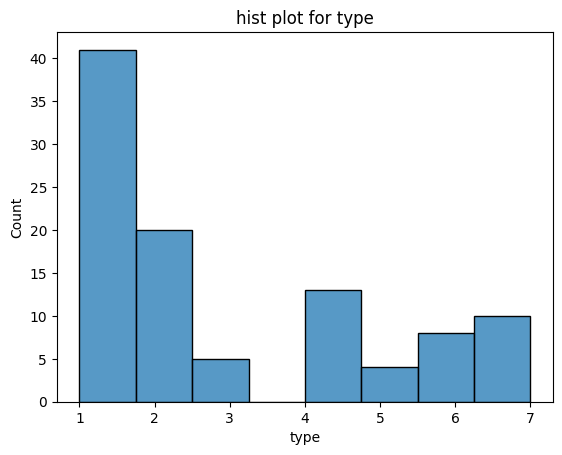

In [ ]:
#histplot to find outliers
for i in df.columns:
    plt.figure( figure=(5,5))
    sns.histplot(x=df[i])
    plt.title(f'hist plot for {i}')
    plt.show()


In [ ]:
# a. Identify Outliers (using IQR method):
def find_outliers_iqr(data):
    """
    Identifies outliers using the Interquartile Range (IQR) method.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Loop through numerical columns and find outliers
for column in df.select_dtypes(include=np.number).columns:
    outliers = find_outliers_iqr(df[column])
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)


Outliers in feathers:
11     1
16     1
20     1
21     1
23     1
33     1
37     1
41     1
43     1
56     1
57     1
58     1
59     1
71     1
78     1
79     1
83     1
87     1
95     1
100    1
Name: feathers, dtype: int64
Outliers in airborne:
11     1
16     1
20     1
21     1
23     1
27     1
30     1
33     1
37     1
39     1
40     1
42     1
43     1
51     1
57     1
59     1
78     1
79     1
83     1
87     1
93     1
95     1
97     1
100    1
Name: airborne, dtype: int64
Outliers in backbone:
13    0
14    0
15    0
24    0
30    0
39    0
40    0
42    0
46    0
51    0
53    0
72    0
77    0
81    0
85    0
88    0
97    0
99    0
Name: backbone, dtype: int64
Outliers in breathes:
2     0
7     0
8     0
12    0
13    0
14    0
15    0
18    0
34    0
38    0
46    0
53    0
60    0
61    0
73    0
76    0
77    0
82    0
85    0
86    0
92    0
Name: breathes, dtype: int64
Outliers in venomous:
26    1
39    1
62    1
72    1
76    1
77    1
86    1
97    1
Na

In [ ]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [ ]:
 #prompt: Split the dataset into training and testing sets
# (80% training, 20% testing).

# Split the dataset into features (X) and target variable (y)
X = df.drop(['type','animal name'],axis=1)
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Assuming X_train, X_test, y_train, y_test are already defined from the previous steps

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors (default is 5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

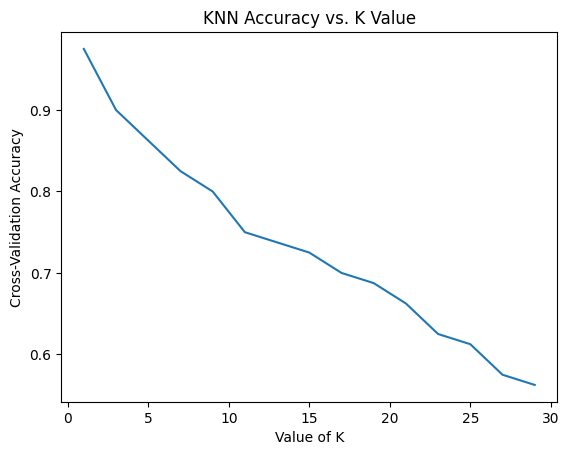

Optimal K: 1


In [ ]:
from sklearn.model_selection import cross_val_score
# Range of K values to test
k_values = range(1, 31, 2)  # Odd numbers from 1 to 30

# Store accuracy scores for each K
cv_scores = []

# Perform cross-validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Specify Euclidean distance
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Plot the accuracy scores
plt.plot(k_values, cv_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.show()

# Find the optimal K
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal K: {optimal_k}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
# Create a new KNN classifier with the optimal K and fit it to the training data
best_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean') # Create a new KNN classifier with the optimal k
best_knn.fit(X_train, y_train) # Fit the model with the training data


# Make predictions on the testing data using the best model
y_pred = best_knn.predict(X_test)  # Use best_knn to predict


# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# You can also continue to print the classification report if you like:
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-119-dbce7b5becbf>:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


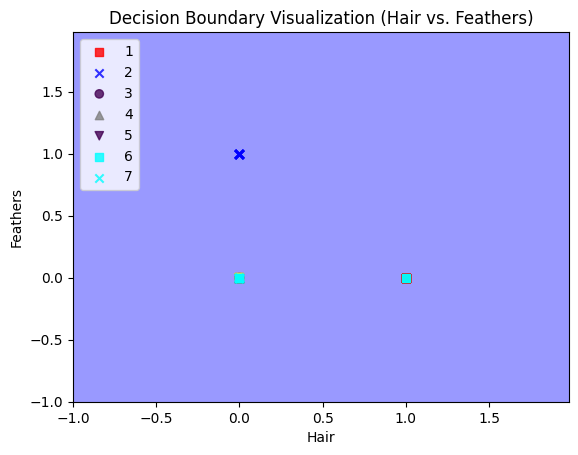

In [ ]:
# prompt: . Visualize the decision boundaries of the classifier.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, classifier, resolution=0.02):
    """
    Plots the decision boundaries of a classifier.

    Args:
        X: Feature data (NumPy array).
        y: Target variable (NumPy array).
        classifier: Trained classifier object.
        resolution: Meshgrid resolution (float).
    """
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # Create input data with the shape (number of meshgrid points, number of features)
    # Initialize with zeros to match the number of features in your original data
    num_features = X_train.shape[1]  # Get the number of features from X_train
    input_data = np.zeros((xx1.ravel().shape[0], num_features))

    # Assign values from meshgrid to the corresponding feature columns
    input_data[:, X_train.columns.get_loc('hair')] = xx1.ravel()
    input_data[:, X_train.columns.get_loc('feathers')] = xx2.ravel()

    #

    Z = classifier.predict(input_data) # Predict with all features.
    Z = Z.reshape(xx1.shape) # Reshape to original shape


    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx %len(markers)], label=cl)

# Example usage (assuming X_train, y_train, and best_knn are defined):
# Select two features for visualization (replace with your desired features)
X_vis = X_train[['hair', 'feathers']].values  # Example: hair and feathers
plot_decision_boundaries(X_vis, y_train, best_knn)
plt.xlabel('Hair')
plt.ylabel('Feathers')
plt.legend(loc='upper left')
plt.title('Decision Boundary Visualization (Hair vs. Feathers)')
plt.show()